<a href="https://colab.research.google.com/github/Shail-Pradhan/Spam_email_classification/blob/main/SpamEmail_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import  CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
spam_df = pd.read_csv('/content/drive/MyDrive/SMSSpamCollection', sep='\t', names=['label', 'messages'])
spam_df

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
spam_df['spam'] = spam_df['label'].apply( lambda x: 1 if x == 'spam' else 0)
spam_df

,label,messages,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


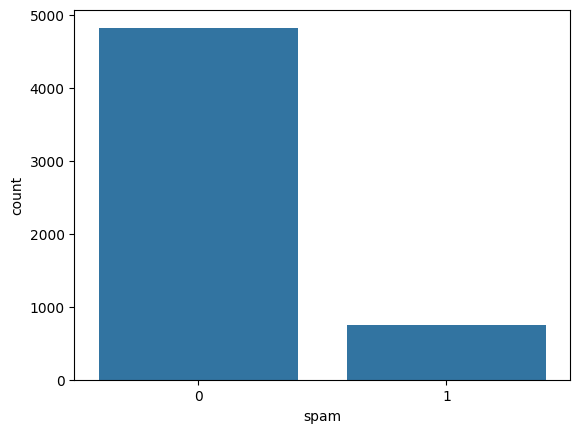

In [ ]:
sns.countplot(data = spam_df, x = "spam")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( spam_df['messages'], spam_df['label'], test_size=0.2, random_state=42)

In [ ]:
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train)
x_test_count = cv.transform(x_test)

In [ ]:
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [ ]:
def process(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, pos_label='ham'))
    print("Recall : ", recall_score(y_test, y_pred, pos_label='ham'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, pos_label='ham'))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()


Precision :  0.9907692307692307
Recall :  1.0
Accuracy :  0.9919282511210762
F1 Score :  0.9953632148377125

[[966   0]
 [  9 140]] 



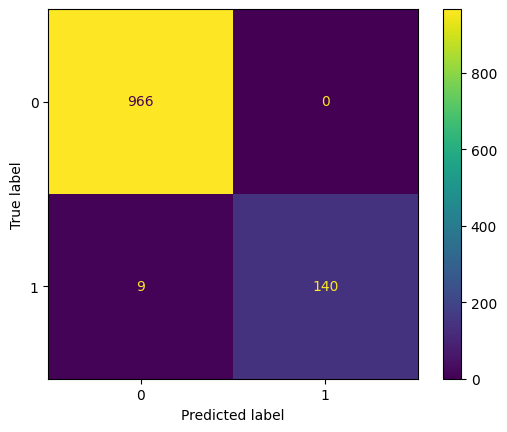

In [ ]:
y_pred = model.predict(x_test_count)
process(y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
email_ham = ['hi sir how are you doing']
email_ham_count = cv.transform(email_ham)
prediction = model.predict(email_ham_count)

if(prediction[0]=='spam'):
    print("The Email is spam.")
else:
    print("Not spam")

Not spam


In [ ]:
email_spam = ['Hurray!! you have won lottery of 1 Cr. Click to collect now.']
email_spam_count = cv.transform(email_spam)
prediction = model.predict(email_spam_count)

if(prediction[0]=='spam'):
    print("The Email is spam.")
else:
    print("Not spam")

The Email is spam.
